In [ ]:
pip install jax

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
from jax import random

In [ ]:
key = random.PRNGKey(0)
cov = np.array([[1,0.4],[0.4,1]])
mean = np.array([3,-1])
x1,x2 = jax.random.multivariate_normal(key,mean,cov,(5000,)).T

In [ ]:
print('x1: ',x1)
print('x2: ',x2)

x1:  [4.396924   0.86031437 4.1461987  ... 3.2030246  3.5699313  4.3775587 ]
x2:  [-0.21168882 -1.5882088  -1.1266787  ... -0.95933944 -0.7026757
  0.19609094]


In [2]:
import jax
import jax.numpy as jnp
import numpy as np
from scipy.stats import norm
import scipy
import matplotlib.pyplot as plt

In [3]:
MeanVec = np.array([0,0])
CovMatrix= np.array([[1,0.6],[0.6,2]])
X = np.arange(-5,5.1,0.1)
Y = np.arange(-5,5.1,0.1)


In [ ]:
X

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [4]:
Z_x = scipy.stats.norm.pdf(X,loc = MeanVec[0],scale = np.sqrt(CovMatrix[0][0]))
Z_y = scipy.stats.norm.pdf(Y,loc=MeanVec[1],scale = np.sqrt(CovMatrix[1][1]))
Samples= np.random.multivariate_normal(MeanVec,CovMatrix,1000)
L = jax.scipy.linalg.cholesky(CovMatrix,lower = True )
t = np.linspace(0,2*np.pi,100)
C = np.array([np.cos(t),np.sin(t)])



In [5]:
E  = np.dot(L,C)
E1 = 1*E
E2 = 2*E
E3 = 3*E

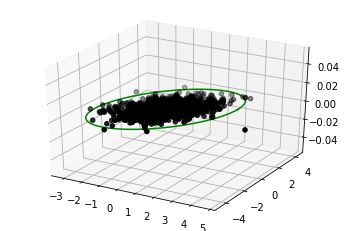

In [68]:
ax = plt.axes(projection='3d')
x = Samples[:,0]
y = Samples[:,1]
z = np.zeros((1000,1))
ax.scatter(x,y,z,color='black')
ax.plot3D(E3[0,:],E3[1,:],np.zeros((100)),color='green')
[n_x, xout] = jnp.histogram(Samples[:,1], bins=20, range=None, weights=None, density=None)
n_x = n_x / ( sum(n_x) *(xout[2]-xout[1]))
[x_Pos,x_Height] = 